# МО для поиска идельных коров.

# Описание проекта:
В нашу компанию обратился фермер, владелец молочного хозяйства «Вольный луг». Он хочет купить бурёнок, чтобы расширить поголовье стада коров. Для этого он заключил выгодный контракт с ассоциацией пастбищ «ЭкоФерма».
Условия позволяют фермеру очень тщательно отобрать коров. Он определяет качество молока по строгой методике, и при этом ему нужно выполнять свой план развития молочного хозяйства. Фермер хочет, чтобы каждая бурёнка давала не менее 6000 килограммов молока в год, а её надой был вкусным — строго по его критериям, ничуть не хуже.
Нам необходимо разработать модель машинного обучения, которая поможет фермеру управлять рисками и принимать объективное решение о покупке коров. «ЭкоФерма»  предоставила подробные данные о своих коровах. Нам нужно создать две прогнозные модели для отбора бурёнок в поголовье:
1. Первая будет прогнозировать возможный удой коровы (целевой признак Удой);
2. Вторая — рассчитывать вероятность получить вкусное молоко от коровы (целевой признак Вкус молока).<br>
С помощью модели нужно отобрать коров по двум критериям:<br>
Средний удой за год — не менее 6000 килограммов;<br>
Молоко должно быть вкусным.<br>

# Краткий план выполнения проекта:
1. Загрузите и изучите данные.<br>
1) Загрузим данные в датафреймы pandas. <br>
2) Изучим данные. Определим, соответствуют ли они описанию задачи и стандартам оформления данных. При необходимости переименуем столбцы.<br>
2. Предобработка данных. <br>
1) Проверим данные на наличие пропусков и дубликатов. Узнаем, корректны ли типы данных у каждого признака. При необходимости устраним все проблемы с данными.<br>
3. Исследовательский анализ данных.  <br>
1) Проведем статистический анализ всех признаков. <br>
2) Построем графики для каждого признака.<br>
3) Сделаем выводы о данных.<br>
4. Проведем корреляционный анализ признаков в датасете фермера.<br>
1) Изучим взаимосвязь между признаками: рассчитаем коэффициенты корреляции между всеми признаками.<br>
2) Построем диаграммы рассеяния scatterplot для признака Удой, кг и всех количественных признаков с учётом значения категориальных признаков.<br>
3) Сделаем выводы о взаимосвязи признаков.<br>
5. Обучим три модели простой линейной регрессии, в качестве целевого признака - удой. Выберем из трех одну лучшую.
6. Обучим модель логистической регрессии.
7. Сделаем итоговые выводы.<br>
1) Добавим прогнозы вкуса молока и удоя коров «ЭкоФермы» в датафрейм с коровами, покупку которых рассматривает фермер.<br>
2) Отберем коров, для которых спрогнозирован удой более 6000 килограммов в год и вкусное молоко.<br>



## 1.Загрузка данных

In [32]:
!pip install phik -q

In [33]:
!pip install scikit-learn==1.3.2 -q

In [34]:
# импортируем все необходимые библиотеки 
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as st
import phik
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.metrics import (mean_squared_error, mean_absolute_error, confusion_matrix,
                             accuracy_score, precision_score, recall_score, r2_score)

In [35]:
# прочитаем и сохраним датасет о стаде фермера
main_data = pd.read_csv('/#####.csv',sep=';')
main_data.head()

,id,"Удой, кг",ЭКЕ (Энергетическая кормовая единица),"Сырой протеин, г",СПО (Сахаро-протеиновое соотношение),Порода,Тип пастбища,порода папы_быка,"Жирность,%","Белок,%",Вкус молока,Возраст
0,1,5863,"14,2",1743,"0,89",Вис Бик Айдиал,Равнинное,Айдиал,"3,58","3,076",вкусно,более_2_лет
1,2,5529,"12,8",2138,"0,89",Вис Бик Айдиал,Равнинные,Соверин,"3,54","3,079",вкусно,менее_2_лет
2,3,5810,14,1854,"0,885",РефлешнСоверинг,Холмистое,Соверин,"3,59","3,074",не вкусно,более_2_лет
3,4,5895,"12,4",2012,"0,885",РефлешнСоверинг,Холмистое,Айдиал,"3,4","3,075",не вкусно,более_2_лет
4,5,5302,"12,8",1675,"0,885",Вис Бик Айдиал,Равнинные,Соверин,"3,73","3,073",вкусно,менее_2_лет


In [36]:
# посмотрим на общуюю информацию о таблице 
main_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 634 entries, 0 to 633
Data columns (total 12 columns):
 #   Column                                 Non-Null Count  Dtype 
---  ------                                 --------------  ----- 
 0   id                                     634 non-null    int64 
 1   Удой, кг                               634 non-null    int64 
 2   ЭКЕ (Энергетическая кормовая единица)  634 non-null    object
 3   Сырой протеин, г                       634 non-null    int64 
 4   СПО (Сахаро-протеиновое соотношение)   634 non-null    object
 5   Порода                                 634 non-null    object
 6   Тип пастбища                           634 non-null    object
 7   порода папы_быка                       634 non-null    object
 8   Жирность,%                             634 non-null    object
 9   Белок,%                                634 non-null    object
 10  Вкус молока                            634 non-null    object
 11  Возраст            

In [37]:
# приведем названия столбцов к нижнему регистру
main_data.columns = main_data.columns.str.lower()

In [38]:
# сократим названия столбцов для "спо" и "эке"
main_data = main_data.rename(columns={'эке (энергетическая кормовая единица)': 'эке',
                                      'спо (сахаро-протеиновое соотношение)': 'спо',
                                      'порода папы_быка':'порода папы быка'})

In [39]:
# посмотрим на результат
main_data.head()

,id,"удой, кг",эке,"сырой протеин, г",спо,порода,тип пастбища,порода папы быка,"жирность,%","белок,%",вкус молока,возраст
0,1,5863,"14,2",1743,"0,89",Вис Бик Айдиал,Равнинное,Айдиал,"3,58","3,076",вкусно,более_2_лет
1,2,5529,"12,8",2138,"0,89",Вис Бик Айдиал,Равнинные,Соверин,"3,54","3,079",вкусно,менее_2_лет
2,3,5810,14,1854,"0,885",РефлешнСоверинг,Холмистое,Соверин,"3,59","3,074",не вкусно,более_2_лет
3,4,5895,"12,4",2012,"0,885",РефлешнСоверинг,Холмистое,Айдиал,"3,4","3,075",не вкусно,более_2_лет
4,5,5302,"12,8",1675,"0,885",Вис Бик Айдиал,Равнинные,Соверин,"3,73","3,073",вкусно,менее_2_лет


In [40]:
# проситаем и сохраним таблицу с именами папы каждой коровы в стаде фермера
dad_data = pd.read_csv('/datasets/ferma_dad.csv',sep=';')
dad_data.head()

,id,Имя Папы
0,1,Буйный
1,2,Соловчик
2,3,Барин
3,4,Буйный
4,5,Барин


In [41]:
# посмотрим на общуюю информацию о таблице 
dad_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 629 entries, 0 to 628
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        629 non-null    int64 
 1   Имя Папы  629 non-null    object
dtypes: int64(1), object(1)
memory usage: 10.0+ KB


In [42]:
# приведем названия столбцов к нижнему регистру
dad_data.columns = dad_data.columns.str.lower()

In [43]:
# посмотрим на результат
dad_data.head()

,id,имя папы
0,1,Буйный
1,2,Соловчик
2,3,Барин
3,4,Буйный
4,5,Барин


In [44]:
# прочитаем и сохраним данные о коровах «ЭкоФермы»
buy_data = pd.read_csv('/datasets/cow_buy.csv',sep=';')
buy_data.head()

,Порода,Тип пастбища,порода папы_быка,Имя_папы,"Текущая_жирность,%","Текущий_уровень_белок,%",Возраст
0,Вис Бик Айдиал,холмистое,Айдиал,Геркулес,"3,58","3,076",более_2_лет
1,Вис Бик Айдиал,равнинное,Соверин,Буйный,"3,54","3,081",менее_2_лет
2,РефлешнСоверинг,равнинное,Соверин,Барин,"3,59","3,074",более_2_лет
3,РефлешнСоверинг,холмистое,Айдиал,Буйный,"3,4","3,061",более_2_лет
4,РефлешнСоверинг,равнинное,Айдиал,Буйный,"3,64","3,074",более_2_лет


In [45]:
# посмотрим на общуюю информацию о таблице 
buy_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Порода                   20 non-null     object
 1   Тип пастбища             20 non-null     object
 2   порода папы_быка         20 non-null     object
 3   Имя_папы                 20 non-null     object
 4   Текущая_жирность,%       20 non-null     object
 5   Текущий_уровень_белок,%  20 non-null     object
 6   Возраст                  20 non-null     object
dtypes: object(7)
memory usage: 1.2+ KB


In [46]:
# приведем названия столбцов к нижнему регистру
buy_data.columns = buy_data.columns.str.lower()

In [47]:
# изменем написание столбцов таблицы
buy_data = buy_data.rename(columns={'порода папы_быка':'порода папы быка',
                                   'имя_папы':'имя папы','текущая_жирность,%':'текущая жирность,%'
                                   ,
                                   'текущий уровень_белок,%':'текущий уровень белок,%'})

In [48]:
# посмотрим на результат
buy_data.head()

,порода,тип пастбища,порода папы быка,имя папы,"текущая жирность,%","текущий_уровень_белок,%",возраст
0,Вис Бик Айдиал,холмистое,Айдиал,Геркулес,"3,58","3,076",более_2_лет
1,Вис Бик Айдиал,равнинное,Соверин,Буйный,"3,54","3,081",менее_2_лет
2,РефлешнСоверинг,равнинное,Соверин,Барин,"3,59","3,074",более_2_лет
3,РефлешнСоверинг,холмистое,Айдиал,Буйный,"3,4","3,061",более_2_лет
4,РефлешнСоверинг,равнинное,Айдиал,Буйный,"3,64","3,074",более_2_лет


### Вывод по первичному знакомству с данными:
1. Названия столбцов во всех таблицах были приведены к нижнему регистру.
2. Сократили названия для :'эке (энергетическая кормовая единица)' на'эке','спо (сахаро-протеиновое соотношение)' на 'спо'.
3. Также привели формат записи названий столбцов к единому типу, например - 'текущая_жирность,%' на 'текущая жирность,%'.
4. В таблицых будет необходимо поменять тип данных с "object" на числовой для: "эке", "спо", "жирность,%", "белок,%", "текущая жирность,%", "текущий уровень белок,%".

##  2.Предобработка данных

In [49]:
# проверим наличие провпусков в таблице фермера. пропусков нет
main_data.isna().sum()

id                  0
удой, кг            0
эке                 0
сырой протеин, г    0
спо                 0
порода              0
тип пастбища        0
порода папы быка    0
жирность,%          0
белок,%             0
вкус молока         0
возраст             0
dtype: int64

In [50]:
# проверим пропуски в таблице с именами отцов коров. пропусков нет
dad_data.isna().sum()

id          0
имя папы    0
dtype: int64

In [51]:
# проверим наличие провпусков в таблице "Эфермера". пропусков нет
buy_data.isna().sum()

порода                     0
тип пастбища               0
порода папы быка           0
имя папы                   0
текущая жирность,%         0
текущий_уровень_белок,%    0
возраст                    0
dtype: int64

In [52]:
# еще раз взшлянем на основную таблицу
main_data.head()

,id,"удой, кг",эке,"сырой протеин, г",спо,порода,тип пастбища,порода папы быка,"жирность,%","белок,%",вкус молока,возраст
0,1,5863,"14,2",1743,"0,89",Вис Бик Айдиал,Равнинное,Айдиал,"3,58","3,076",вкусно,более_2_лет
1,2,5529,"12,8",2138,"0,89",Вис Бик Айдиал,Равнинные,Соверин,"3,54","3,079",вкусно,менее_2_лет
2,3,5810,14,1854,"0,885",РефлешнСоверинг,Холмистое,Соверин,"3,59","3,074",не вкусно,более_2_лет
3,4,5895,"12,4",2012,"0,885",РефлешнСоверинг,Холмистое,Айдиал,"3,4","3,075",не вкусно,более_2_лет
4,5,5302,"12,8",1675,"0,885",Вис Бик Айдиал,Равнинные,Соверин,"3,73","3,073",вкусно,менее_2_лет


In [53]:
# и на информацию о ней
main_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 634 entries, 0 to 633
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   id                634 non-null    int64 
 1   удой, кг          634 non-null    int64 
 2   эке               634 non-null    object
 3   сырой протеин, г  634 non-null    int64 
 4   спо               634 non-null    object
 5   порода            634 non-null    object
 6   тип пастбища      634 non-null    object
 7   порода папы быка  634 non-null    object
 8   жирность,%        634 non-null    object
 9   белок,%           634 non-null    object
 10  вкус молока       634 non-null    object
 11  возраст           634 non-null    object
dtypes: int64(3), object(9)
memory usage: 59.6+ KB


In [54]:
# приведем значения к числовому формату

main_data['эке'] = main_data['эке'].str.replace(',','.')
main_data['эке'] = main_data['эке'].astype('float')
main_data['спо'] = main_data['спо'].str.replace(',','.')
main_data['спо'] = main_data['спо'].astype('float')
main_data['жирность,%'] = main_data['жирность,%'].str.replace(',','.')
main_data['жирность,%'] = main_data['жирность,%'].astype('float')
main_data['белок,%'] = main_data['белок,%'].str.replace(',','.')
main_data['белок,%'] = main_data['белок,%'].astype('float')

In [55]:
# проверим результат. все в порядке
main_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 634 entries, 0 to 633
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   id                634 non-null    int64  
 1   удой, кг          634 non-null    int64  
 2   эке               634 non-null    float64
 3   сырой протеин, г  634 non-null    int64  
 4   спо               634 non-null    float64
 5   порода            634 non-null    object 
 6   тип пастбища      634 non-null    object 
 7   порода папы быка  634 non-null    object 
 8   жирность,%        634 non-null    float64
 9   белок,%           634 non-null    float64
 10  вкус молока       634 non-null    object 
 11  возраст           634 non-null    object 
dtypes: float64(4), int64(3), object(5)
memory usage: 59.6+ KB


In [56]:
# проверим уникальные значения в столбце с породой коров
main_data['порода'].unique()

array(['Вис Бик Айдиал', 'РефлешнСоверинг'], dtype=object)

In [57]:
# немного изменим запись породы "Рефлешн Соверинг"
main_data['порода'] = main_data['порода'].str.replace('РефлешнСоверинг','Рефлешн Соверинг')

In [58]:
# проверим уникальные значения в столбце с типом пастбищ
main_data['тип пастбища'].unique()

array(['Равнинное', 'Равнинные', 'Холмистое'], dtype=object)

In [59]:
# был обнаружен неявный дуюликат: 'Равнинное' и 'Равнинные' это одно и тоже значение. приведем все к одному варианту записи 
main_data['тип пастбища'] = main_data['тип пастбища'].str.replace('Равнинные', 'Равнинное')
main_data['тип пастбища'].unique()

array(['Равнинное', 'Холмистое'], dtype=object)

In [60]:
# проверим уникальные значения в столбце с породой папы быка
main_data['порода папы быка'].unique()

array(['Айдиал', 'Соверин', 'Айдиалл'], dtype=object)

In [61]:
# был обнаружен неявный дуюликат: 'Айдиал', Айдиалл' это одно и тоже значение. приведем все к одному варианту записи 
main_data['порода папы быка'] = main_data['порода папы быка'].str.replace('Айдиалл','Айдиал')
main_data['порода папы быка'].unique()

array(['Айдиал', 'Соверин'], dtype=object)

In [62]:
main_data['порода папы быка'] = main_data['порода папы быка'].str.lower()
main_data['порода папы быка'].unique()

array(['айдиал', 'соверин'], dtype=object)

In [63]:
# проверим уникальные значения в столбце "вкус молока". все в порядке
main_data['вкус молока'].unique()

array(['вкусно', 'не вкусно'], dtype=object)

In [64]:
# проверим уникальные значения в столбце "возраст". все в порядке
main_data['возраст'].unique()

array(['более_2_лет', 'менее_2_лет'], dtype=object)

In [65]:
# приведем запись к стандартному виду
main_data['возраст'] = main_data['возраст'].str.replace('_',' ')
main_data['возраст'].unique()

array(['более 2 лет', 'менее 2 лет'], dtype=object)

In [66]:
# проверим уникальные значения в столбце "имя папы". все в порядке
dad_data['имя папы'].unique()

array(['Буйный', 'Соловчик', 'Барин', 'Геркулес'], dtype=object)

In [67]:
# еше раз посмотрим на таблицу экофермы и на информацию о ней
buy_data.head()

,порода,тип пастбища,порода папы быка,имя папы,"текущая жирность,%","текущий_уровень_белок,%",возраст
0,Вис Бик Айдиал,холмистое,Айдиал,Геркулес,"3,58","3,076",более_2_лет
1,Вис Бик Айдиал,равнинное,Соверин,Буйный,"3,54","3,081",менее_2_лет
2,РефлешнСоверинг,равнинное,Соверин,Барин,"3,59","3,074",более_2_лет
3,РефлешнСоверинг,холмистое,Айдиал,Буйный,"3,4","3,061",более_2_лет
4,РефлешнСоверинг,равнинное,Айдиал,Буйный,"3,64","3,074",более_2_лет


In [68]:
buy_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   порода                   20 non-null     object
 1   тип пастбища             20 non-null     object
 2   порода папы быка         20 non-null     object
 3   имя папы                 20 non-null     object
 4   текущая жирность,%       20 non-null     object
 5   текущий_уровень_белок,%  20 non-null     object
 6   возраст                  20 non-null     object
dtypes: object(7)
memory usage: 1.2+ KB


In [69]:
# переименнуем названия столбцов с уровнем белка и жирности
buy_data = buy_data.rename(columns={'текущий_уровень_белок,%':'белок,%'})
buy_data = buy_data.rename(columns={'текущая жирность,%':'жирность,%'})

In [70]:
# приведем данные в столбцах с уровенем белка и жерностью к числовому формату
buy_data['жирность,%'] = buy_data['жирность,%'].str.replace(',','.')
buy_data['жирность,%'] = buy_data['жирность,%'].astype('float')
buy_data['белок,%'] = buy_data['белок,%'].str.replace(',','.')
buy_data['белок,%'] = buy_data['белок,%'].astype('float')

In [71]:
# проверим результат. все в порядке
buy_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   порода            20 non-null     object 
 1   тип пастбища      20 non-null     object 
 2   порода папы быка  20 non-null     object 
 3   имя папы          20 non-null     object 
 4   жирность,%        20 non-null     float64
 5   белок,%           20 non-null     float64
 6   возраст           20 non-null     object 
dtypes: float64(2), object(5)
memory usage: 1.2+ KB


In [72]:
# проверим уникальные значения в столбце с породой 
buy_data['порода'].unique()

array(['Вис Бик Айдиал', 'РефлешнСоверинг'], dtype=object)

In [73]:
# немного изменим вид записи породы
buy_data['порода'] = buy_data['порода'].str.replace('РефлешнСоверинг','Рефлешн Соверинг')

In [74]:
# проверим уникальные значения в столбце с типом пастбищ
buy_data['тип пастбища'].unique()

array(['холмистое', 'равнинное'], dtype=object)

In [75]:
# проверим уникальные значения в столбце с породой папы быка
buy_data['порода папы быка'].unique()

array(['Айдиал', 'Соверин'], dtype=object)

In [76]:
# проверим уникальные значения в столбце с именем папы
buy_data['имя папы'].unique()

array(['Геркулес', 'Буйный', 'Барин', 'Соловчик'], dtype=object)

In [77]:
# изменим формат записи возроста
buy_data['возраст'] = buy_data['возраст'].str.replace('_',' ')

In [78]:
# проверим наличие явных дубликатов в таблице фермера
main_data.duplicated().sum()

5

In [79]:
# полные дубликаты
main_data[main_data.duplicated()==True]

,id,"удой, кг",эке,"сырой протеин, г",спо,порода,тип пастбища,порода папы быка,"жирность,%","белок,%",вкус молока,возраст
629,627,5970,14.4,1837,0.88,Рефлешн Соверинг,Холмистое,соверин,3.64,3.075,не вкусно,более 2 лет
630,627,5970,14.4,1837,0.88,Рефлешн Соверинг,Холмистое,соверин,3.64,3.075,не вкусно,более 2 лет
631,627,5970,14.4,1837,0.88,Рефлешн Соверинг,Холмистое,соверин,3.64,3.075,не вкусно,более 2 лет
632,627,5970,14.4,1837,0.88,Рефлешн Соверинг,Холмистое,соверин,3.64,3.075,не вкусно,более 2 лет
633,627,5970,14.4,1837,0.88,Рефлешн Соверинг,Холмистое,соверин,3.64,3.075,не вкусно,более 2 лет


In [80]:
# было обнаруженно 5 дулбикатов , удалим их
main_data = main_data.drop_duplicates()

In [81]:
# проверим результат, все в порядке 
main_data.duplicated().sum()

0

In [82]:
# проверим кол-во явных дубликатов в таблице с отцами коров, их нет 
dad_data.duplicated().sum()

0

In [83]:
# проверим наличие явных дубликатов в таблице "Экофермы"
buy_data.duplicated().sum()

4

In [84]:
# полные дубликаты
buy_data[buy_data.duplicated()==True]

,порода,тип пастбища,порода папы быка,имя папы,"жирность,%","белок,%",возраст
6,Вис Бик Айдиал,холмистое,Айдиал,Геркулес,3.58,3.076,более 2 лет
8,Рефлешн Соверинг,равнинное,Соверин,Барин,3.59,3.074,более 2 лет
14,Рефлешн Соверинг,равнинное,Соверин,Барин,3.59,3.074,более 2 лет
19,Рефлешн Соверинг,равнинное,Айдиал,Буйный,3.64,3.074,более 2 лет


In [85]:
# было обнаруженно 4 дулбиката , удалим их
buy_data = buy_data.drop_duplicates()

In [86]:
# проверим результат, все в порядке
buy_data.duplicated().sum()

0

## Вывод по предобработке данных:
1. Были удалены явные дубликаты в таблицах фермера и Экофермы.
2. Проверили наличие пропусков в таблицах, их нет.
3. Поменяли тип данных с "object" на числовой для: "эке", "спо", "жирность,%", "белок,%", "текущая жирность,%", "текущий уровень белок,%".
4. Обнаружили и убрали неявные дубликаты: 'Равнинное' - 'Равнинные', 'Айдиал' - 'Айдиалл'.
5. Привели к единому формату записи котегориальные значения в таблицах : "_" заменили на пробел и добавили провебел там, где это нужно.



## 3.Исследовательский анализ данных

In [87]:
# основная таблица
main_data.head()

,id,"удой, кг",эке,"сырой протеин, г",спо,порода,тип пастбища,порода папы быка,"жирность,%","белок,%",вкус молока,возраст
0,1,5863,14.2,1743,0.890,Вис Бик Айдиал,Равнинное,айдиал,3.58,3.076,вкусно,более 2 лет
1,2,5529,12.8,2138,0.890,Вис Бик Айдиал,Равнинное,соверин,3.54,3.079,вкусно,менее 2 лет
2,3,5810,14.0,1854,0.885,Рефлешн Соверинг,Холмистое,соверин,3.59,3.074,не вкусно,более 2 лет
3,4,5895,12.4,2012,0.885,Рефлешн Соверинг,Холмистое,айдиал,3.40,3.075,не вкусно,более 2 лет
4,5,5302,12.8,1675,0.885,Вис Бик Айдиал,Равнинное,соверин,3.73,3.073,вкусно,менее 2 лет


In [88]:
# статистика удоя
main_data['удой, кг'].describe()

count      629.000000
mean      6188.750397
std       1644.795489
min       5204.000000
25%       5751.000000
50%       6133.000000
75%       6501.000000
max      45616.000000
Name: удой, кг, dtype: float64

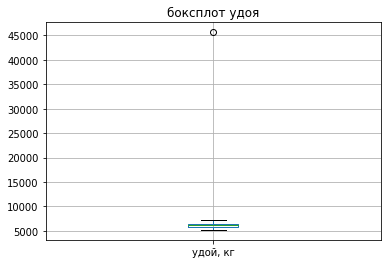

In [89]:
# ящик с усами дял удоя
main_data.boxplot(column='удой, кг')
plt.title('боксплот удоя')
plt.show()

In [90]:
# в данных есть один выброс. уберем его
main_data = main_data.loc[main_data['удой, кг'] < 45000]

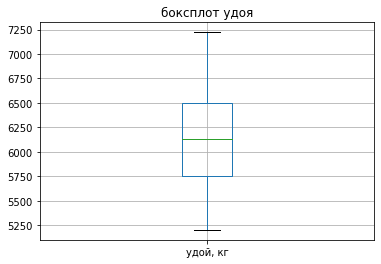

In [91]:
# ящик с усами для удоя без выброса
main_data.boxplot(column='удой, кг')
plt.title('боксплот удоя')
plt.show()

In [92]:
# статистика для удоя без выброса
main_data['удой, кг'].describe()

count     628.000000
mean     6125.968153
std       475.857053
min      5204.000000
25%      5749.750000
50%      6132.500000
75%      6501.000000
max      7222.000000
Name: удой, кг, dtype: float64

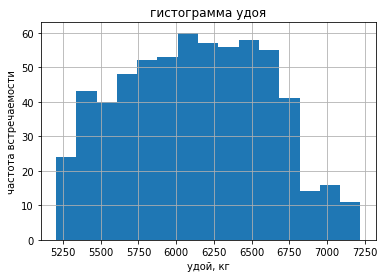

In [93]:
main_data['удой, кг'].hist(bins=15)
plt.xlabel('удой, кг')
plt.ylabel('частота встречаемости')
plt.title('гистограмма удоя')
plt.show()

На гистограмме видем, что в основном удой лежит в пределах от 5750 кг до 6500 кг в год. При этом данные не имеют нормального расспределения. 

In [94]:
# взглянем на статистику Энергетической кормовой единицы
main_data['эке'].describe()

count    628.000000
mean      14.548726
std        1.301777
min       10.900000
25%       13.500000
50%       14.700000
75%       15.600000
max       16.800000
Name: эке, dtype: float64

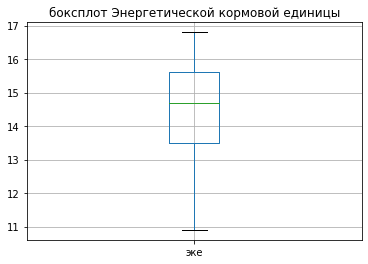

In [95]:
# посторим боксплот Энергетической кормовой единицы. видим , что выбросов нет
main_data.boxplot(column='эке')
plt.title('боксплот Энергетической кормовой единицы')
plt.show()

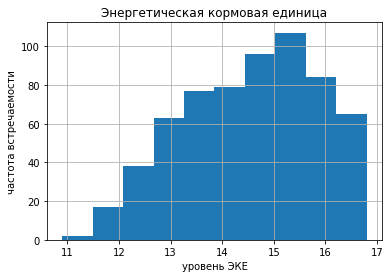

In [96]:
# 
main_data['эке'].hist()
plt.title('Энергетическая кормовая единица')
plt.xlabel('уровень ЭКЕ')
plt.ylabel('частота встречаемости')
plt.show()

Можем наблюдать, что показатель "эке" в соновном находиться в диапозоне от 13.5 до 15.6. При этом данные не имеют нормального расспределения. 

In [97]:
# взглянем на статистику сырого протеина
main_data['сырой протеин, г'].describe()

count     628.000000
mean     1923.759554
std       182.832816
min      1660.000000
25%      1771.750000
50%      1888.000000
75%      2062.250000
max      2349.000000
Name: сырой протеин, г, dtype: float64

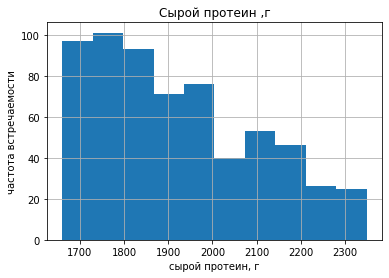

In [98]:
main_data['сырой протеин, г'].hist()
plt.title('Cырой протеин ,г')
plt.xlabel('сырой протеин, г')
plt.ylabel('частота встречаемости')
plt.show()

Можем наблюдать, что показатель "сырой протеин,г" в соновном находиться в диапозоне от 1772 до 2062. При этом данные не имеют нормального расспределения.

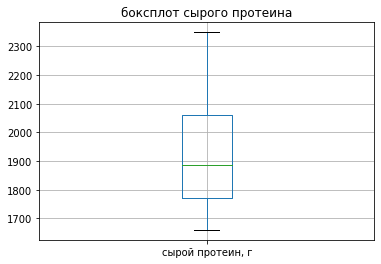

In [99]:
# посторим боксплот сырого протеина. видим , что выбросов нет
main_data.boxplot(column='сырой протеин, г')
plt.title('боксплот сырого протеина')
plt.show()

In [100]:
# взглянем на статистику спо
main_data['спо'].describe()

count    628.000000
mean       0.913089
std        0.032221
min        0.840000
25%        0.890000
50%        0.930000
75%        0.940000
max        0.960000
Name: спо, dtype: float64

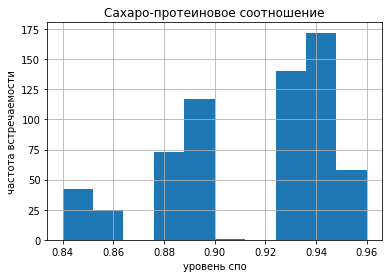

In [101]:
# гистограмма СПО
main_data['спо'].hist()
plt.title('Сахаро-протеиновое соотношение')
plt.xlabel('уровень спо')
plt.ylabel('частота встречаемости')
plt.show()

На гистограмме видим, что есть три ярко выраженных диапазона в расспределении "спо". Так же данные не имеют нормалного расспределения.

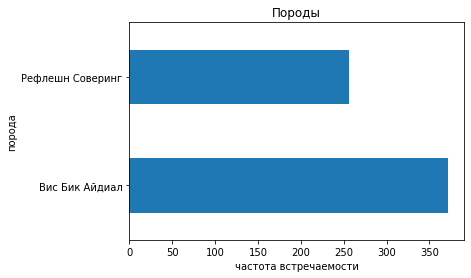

In [102]:
# столбчатая диаграмма по породам коров
main_data['порода'].value_counts().plot.barh()
plt.title('Породы')
plt.xlabel('частота встречаемости')
plt.ylabel('порода')
plt.show()

На столбчатой диаграмме видим, что больше коров породы "Вис Бик Айдиал"

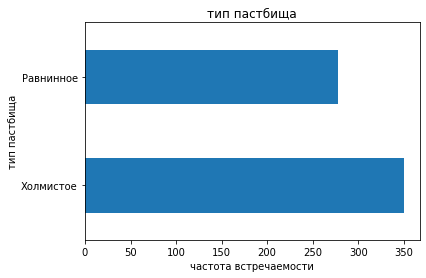

In [103]:
# столбчатая диаграмма по типу пастбищ
main_data['тип пастбища'].value_counts().plot.barh()
plt.title('тип пастбища')
plt.xlabel('частота встречаемости')
plt.ylabel('тип пастбища')
plt.show()

Столбчатая диаграмма показывает большее кол-во холмистого типа пастбища.

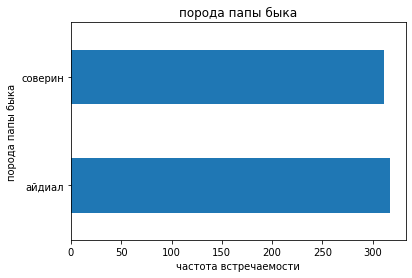

In [104]:
# столбчатая диаграмма по породе папы быка
main_data['порода папы быка'].value_counts().plot.barh()
plt.title('порода папы быка')
plt.xlabel('частота встречаемости')
plt.ylabel('порода папы быка')
plt.show()

Порода папы быка распределена примерно одинакого.

In [105]:
# статистика для жирности,%
main_data['жирность,%'].describe()

count    628.000000
mean       3.604268
std        0.168093
min        2.990000
25%        3.590000
50%        3.650000
75%        3.720000
max        3.750000
Name: жирность,%, dtype: float64

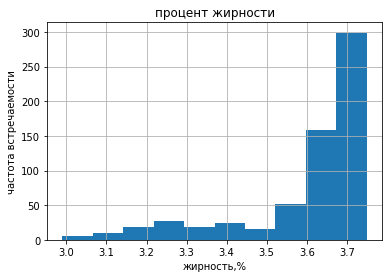

In [106]:
# гистограмма для процента жирности
main_data['жирность,%'].hist()
plt.title('процент жирности')
plt.ylabel('частота встречаемости')
plt.xlabel('жирность,%')
plt.show()

В основном "жирность,%" находится в пределах от 3.6 до 3.72. Данные не имеют нормального расспределения. 

In [107]:
# статистика для белка,%
main_data['белок,%'].describe()

count    628.000000
mean       3.075670
std        0.002551
min        3.069000
25%        3.074000
50%        3.076000
75%        3.077000
max        3.085000
Name: белок,%, dtype: float64

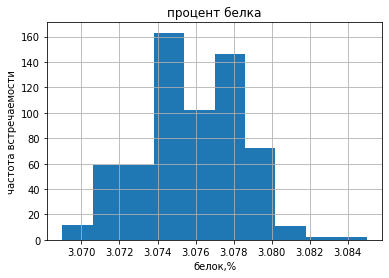

In [108]:
# гистограмма для белка,%
main_data['белок,%'].hist()
plt.title('процент белка')
plt.ylabel('частота встречаемости')
plt.xlabel('белок,%')
plt.show()

Процент белка имеет крайне низкое стандартное отклонение, среднее значение - 3.075. Данные не нормально расспределены.

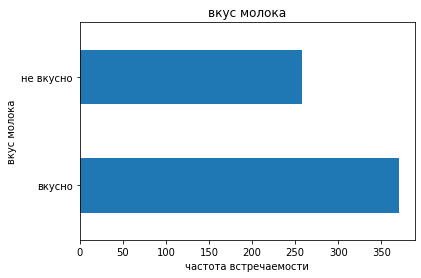

In [109]:
# столбчатая диаграмма для вкуса молока
main_data['вкус молока'].value_counts().plot.barh()
plt.title('вкус молока')
plt.xlabel('частота встречаемости')
plt.ylabel('вкус молока')
plt.show()

Столбчатая диграмма показывает, что в основном молоко у фермера вкусное. 

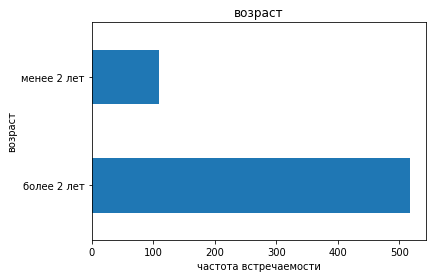

In [110]:
# столбчатая диаграмма для возраста
main_data['возраст'].value_counts().plot.barh()
plt.title('возраст')
plt.xlabel('частота встречаемости')
plt.ylabel('возраст')
plt.show()

Можем наблюдать, что большая часть коров страше 2 лет.

In [111]:
dad_data.head()

,id,имя папы
0,1,Буйный
1,2,Соловчик
2,3,Барин
3,4,Буйный
4,5,Барин


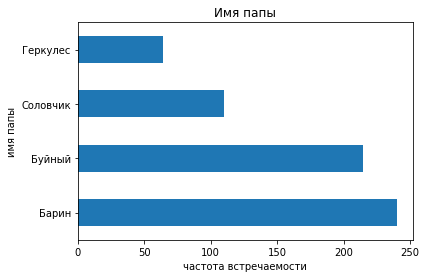

In [112]:
# столбчатая диаграмма имен пап коров 
dad_data['имя папы'].value_counts().plot.barh()
plt.title('Имя папы')
plt.xlabel('частота встречаемости')
plt.ylabel('имя папы')
plt.show()

Столбчатая диаграмма показывает распределение коров по отцу: первое место - Барин, второе - Буйный, третье - Соловчик, четвертое - геркулес.

In [113]:
# еще раз взглянем на таблицу экофермы 
buy_data.head()

,порода,тип пастбища,порода папы быка,имя папы,"жирность,%","белок,%",возраст
0,Вис Бик Айдиал,холмистое,Айдиал,Геркулес,3.58,3.076,более 2 лет
1,Вис Бик Айдиал,равнинное,Соверин,Буйный,3.54,3.081,менее 2 лет
2,Рефлешн Соверинг,равнинное,Соверин,Барин,3.59,3.074,более 2 лет
3,Рефлешн Соверинг,холмистое,Айдиал,Буйный,3.40,3.061,более 2 лет
4,Рефлешн Соверинг,равнинное,Айдиал,Буйный,3.64,3.074,более 2 лет


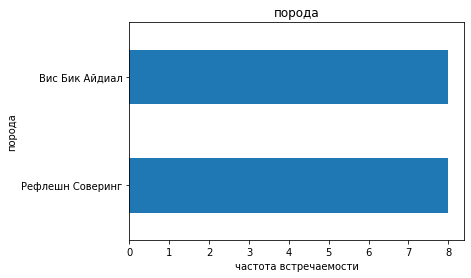

In [114]:
# столбчатая диаграмма для пород коров 
buy_data['порода'].value_counts().plot.barh()
plt.title('порода')
plt.xlabel('частота встречаемости')
plt.ylabel('порода')
plt.show()

Коровы распределены по породам примерно одинаково.

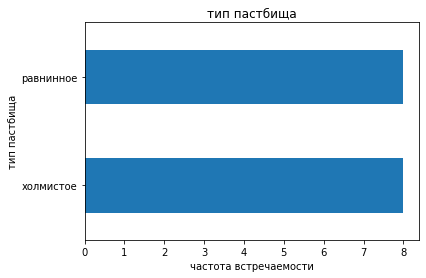

In [115]:
# столбчатая диаграмма для типа пастбищ
buy_data['тип пастбища'].value_counts().plot.barh()
plt.title('тип пастбища')
plt.xlabel('частота встречаемости')
plt.ylabel('тип пастбища')
plt.show()

Тип пастбища также имеет приблизительно одинаковое распределение.

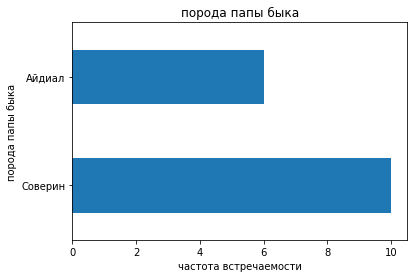

In [116]:
# столбчатая диаграмма для породы папы быков 
buy_data['порода папы быка'].value_counts().plot.barh()
plt.title('порода папы быка')
plt.xlabel('частота встречаемости')
plt.ylabel('порода папы быка')
plt.show()

График показывает, что Соверин - это более распространенная порода папы быка.

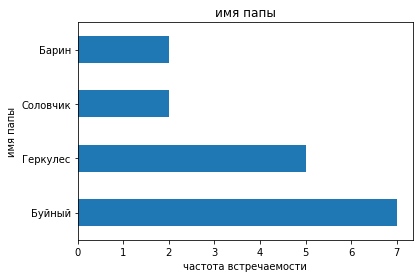

In [117]:
# столбчатая диаграмма для имени папы
buy_data['имя папы'].value_counts().plot.barh()
plt.title('имя папы')
plt.xlabel('частота встречаемости')
plt.ylabel('имя папы')
plt.show()

Среди пап коров превое место занимает - Буйный, второе - Геркулес, далее идут Барин и Соловчик приблизительно с одинаковыми показателями. 

In [118]:
# статистика для жирность,%
buy_data['жирность,%'].describe()

count    16.000000
mean      3.571875
std       0.141620
min       3.340000
25%       3.415000
50%       3.585000
75%       3.692500
max       3.770000
Name: жирность,%, dtype: float64

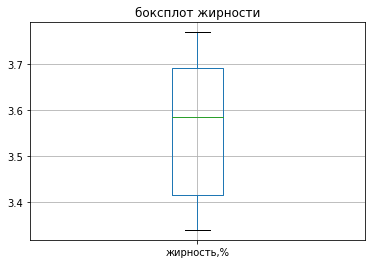

In [119]:
# ящик с усами для "жирность,%"
buy_data.boxplot(column='жирность,%')
plt.title('боксплот жирности')
plt.show()

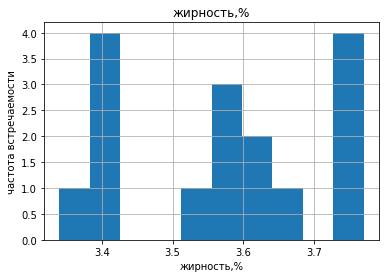

In [120]:
buy_data['жирность,%'].hist()
plt.title('жирность,%')
plt.ylabel('частота встречаемости')
plt.xlabel('жирность,%')
plt.show()

На боксплоте видим, что выбросов нет. Гистограмма показывает ненормальное расспределение данных на три котегории. В основном значения лежат в приделах от 3.4 до 3.7.

In [121]:
# статистика для процента белка
buy_data['белок,%'].describe()

count    16.000000
mean      3.068250
std       0.011264
min       3.046000
25%       3.059500
50%       3.073500
75%       3.076750
max       3.081000
Name: белок,%, dtype: float64

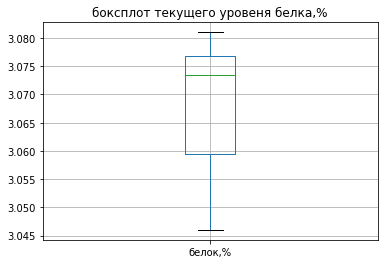

In [122]:
buy_data.boxplot(column='белок,%')
plt.title('боксплот текущего уровеня белка,%')
plt.show()

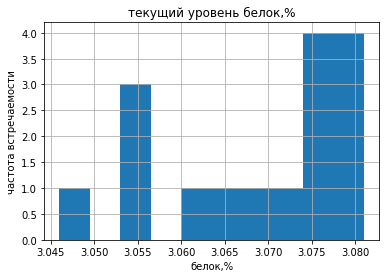

In [123]:
buy_data['белок,%'].hist()
plt.title('текущий уровень белок,%')
plt.ylabel('частота встречаемости')
plt.xlabel('белок,%')
plt.show()

Боксплот показывает, что выбросов нет. На гистограмме наблюдаем ненормальное расспределение данных на три котегории. В основном значения лежат в приделах от 3.06 до 3.8, крайне низкое стандартное отклонение.

## Вывод по ииследовательскому анализу данных:
1. Во всех данных был обнаружен только один выброс, в таблице фермера в столбце с удоем. Выброс был удален.
2. Для колличественных данных характерно ненормальное расспределение. 
3. Для стада фермера характерно: <br>
1) Медиальное значение удоя выше 6000 кг. <br>
2) Большая часть коров породы "Вис Бик Айдиал". <br>
3) Преобладает холмистый тип пастбищаю <br>
4) По большей части молоко у фермера вкусное. <br>
5) Подовляющая часть коров страше 2 лет. <br>
4. Таблица с именами папы коровы, распределение коров по отцу:  <br>
   первое место - Барин, второе - Буйный, третье - Соловчик, четвертое - геркулес. <br>
5. Данные "Экофермы": <br>
1) Породы коров расспределены равномерно. <br>
2) Тип пастбищ также имеет равномерное расспределение. <br>
3) Соверин - это более распространенная порода папы быка. <br>
4) Среди пап коров превое место занимает - Буйный, второе - Геркулес, далее идут Барин и Соловчик приблизительно с одинаковыми показателями. <br>

## 4.Корреляционный анализ

In [124]:
# матрица корреляции
main_data.phik_matrix()

interval columns not set, guessing: ['id', 'удой, кг', 'эке', 'сырой протеин, г', 'спо', 'жирность,%', 'белок,%']


,id,"удой, кг",эке,"сырой протеин, г",спо,порода,тип пастбища,порода папы быка,"жирность,%","белок,%",вкус молока,возраст
id,1.000000,0.000000,0.000000,0.108271,0.382303,0.611843,0.037776,0.320977,0.519949,0.000000,0.039659,0.000000
"удой, кг",0.000000,1.000000,0.719239,0.465118,0.661615,0.161643,0.279645,0.518114,0.706516,0.063045,0.178281,0.998071
эке,0.000000,0.719239,1.000000,0.458283,0.591190,0.123086,0.106758,0.171355,0.715914,0.000000,0.272265,0.771596
"сырой протеин, г",0.108271,0.465118,0.458283,1.000000,0.386550,0.090971,0.097165,0.000000,0.397691,0.202386,0.173817,0.353829
спо,0.382303,0.661615,0.591190,0.386550,1.000000,0.062660,0.155349,0.425601,0.645581,0.073787,0.572702,0.744410
порода,0.611843,0.161643,0.123086,0.090971,0.062660,1.000000,0.213218,0.089330,0.222825,0.361851,0.000000,0.057295
тип пастбища,0.037776,0.279645,0.106758,0.097165,0.155349,0.213218,1.000000,0.000000,0.000000,0.099908,0.269063,0.128455
порода папы быка,0.320977,0.518114,0.171355,0.000000,0.425601,0.089330,0.000000,1.000000,0.000000,0.134582,0.000000,0.355817
"жирность,%",0.519949,0.706516,0.715914,0.397691,0.645581,0.222825,0.000000,0.000000,1.000000,0.000000,0.198793,0.677913
"белок,%",0.000000,0.063045,0.000000,0.202386,0.073787,0.361851,0.099908,0.134582,0.000000,1.000000,0.143857,0.000000


interval columns not set, guessing: ['id', 'удой, кг', 'эке', 'сырой протеин, г', 'спо', 'жирность,%', 'белок,%']


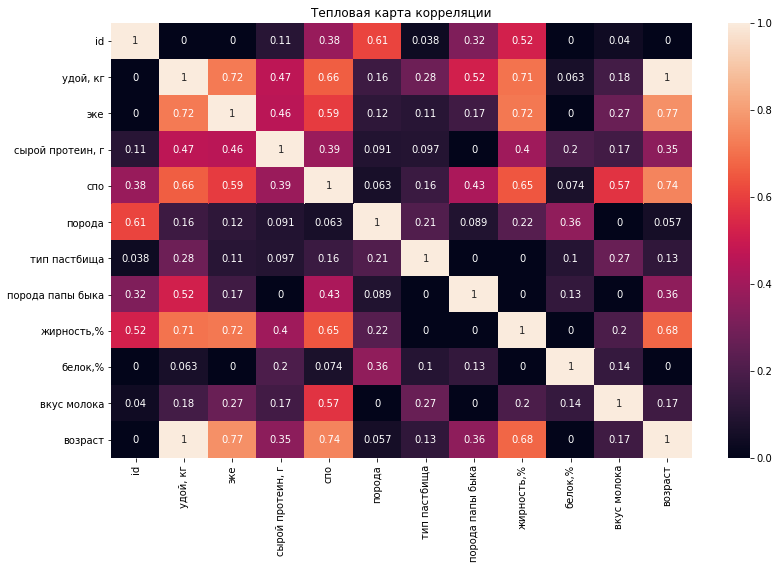

In [125]:
# тепловая карта корреляции
plt.figure(figsize=(13, 8))
sns.heatmap(main_data.phik_matrix(), annot=True) 
plt.title("Тепловая карта корреляции")
plt.show()

Матрица и тепловая карта корреляции показывают, что удой больше всего коррелирует с: "возраст","эке", "спо", "жирность". Наблюдается мултиколлинеарность у "эке" с "жирность,%" и "возраст", также у "спо" с "возраст".

In [126]:
main_data.corr(method='spearman')

,id,"удой, кг",эке,"сырой протеин, г",спо,"жирность,%","белок,%"
id,1.000000,-0.003097,-0.022382,-0.037108,-0.021642,0.038631,0.003743
"удой, кг",-0.003097,1.000000,0.765144,0.437543,0.787904,0.688506,-0.005701
эке,-0.022382,0.765144,1.000000,0.384747,0.741962,0.686973,-0.013321
"сырой протеин, г",-0.037108,0.437543,0.384747,1.000000,0.485890,0.392822,0.229051
спо,-0.021642,0.787904,0.741962,0.485890,1.000000,0.701044,0.109924
"жирность,%",0.038631,0.688506,0.686973,0.392822,0.701044,1.000000,0.043125
"белок,%",0.003743,-0.005701,-0.013321,0.229051,0.109924,0.043125,1.000000


In [127]:
# корреляция Спирмена для удоя и "эке"
main_data['удой, кг'].corr(main_data['эке'],method='spearman')

0.7651443116006692

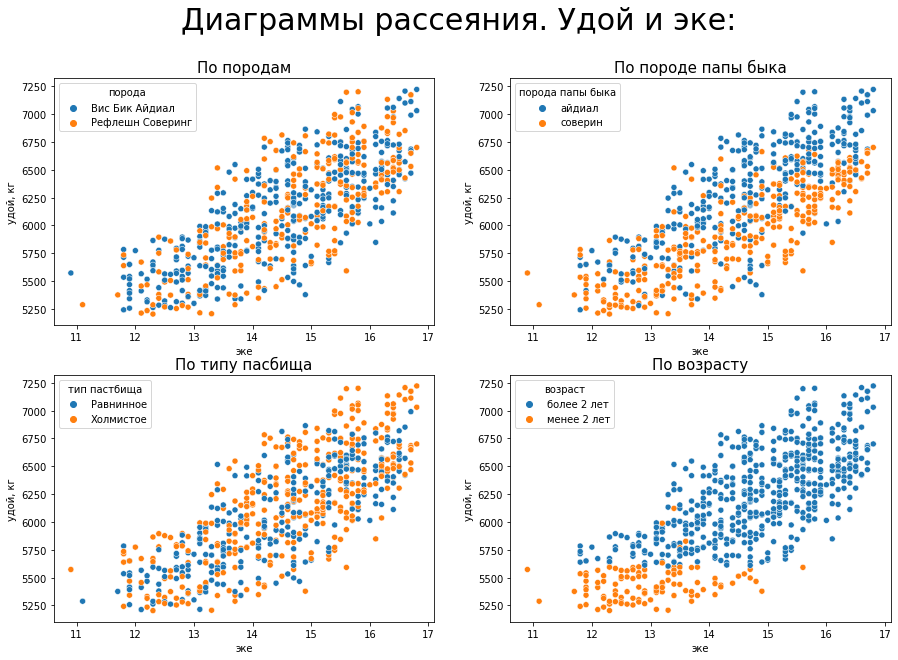

In [128]:
fig, axes = plt.subplots(2,2,figsize=(15,10))
plt.suptitle('Диаграммы рассеяния. Удой и эке:').set_size(30)
sns.scatterplot(data=main_data, y='удой, кг', x='эке',hue='порода',ax=axes[0,0])
axes[0,0].set_title('По породам').set_size(15)
sns.scatterplot(data=main_data, y='удой, кг', x='эке',hue='тип пастбища',ax=axes[1,0])
axes[1,0].set_title('По типу пасбища').set_size(15)
sns.scatterplot(data=main_data, y='удой, кг', x='эке',hue='порода папы быка',ax=axes[0,1])
axes[0,1].set_title('По породе папы быка').set_size(15)
sns.scatterplot(data=main_data, y='удой, кг', x='эке',hue='возраст',ax=axes[1,1])
axes[1,1].set_title('По возрасту').set_size(15)
plt.show()

Диаграмма рассеяния показывает зависимоть удоя от "эке". Можно заметить, что имеется нелинейная зависимость. Расспределение по типу пастбища и по породам выглядит равномерно. По возрасту заметны более высокие значения для коров старше 2 лет. По породе пары быка наблюдаем более высокие значения для породы "Айдиал".

In [129]:
# корреляция Спирмена для удоя и "спо"
main_data['удой, кг'].corr(main_data['спо'],method='spearman')

0.787904090851949

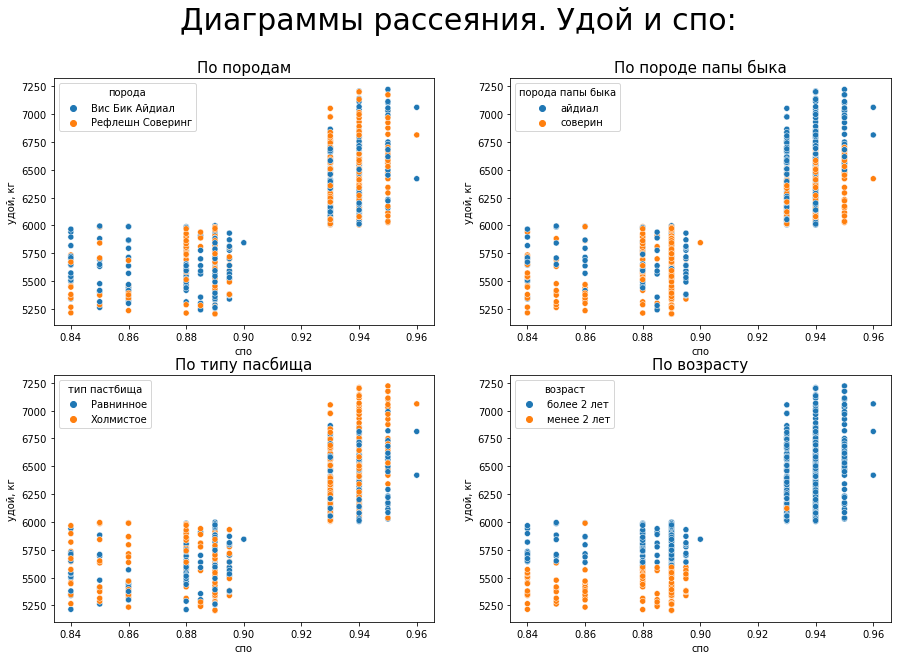

In [130]:
fig, axes = plt.subplots(2,2,figsize=(15,10))
plt.suptitle('Диаграммы рассеяния. Удой и спо:').set_size(30)
sns.scatterplot(data=main_data, y='удой, кг', x='спо',hue='порода',ax=axes[0,0])
axes[0,0].set_title('По породам').set_size(15)
sns.scatterplot(data=main_data, y='удой, кг', x='спо',hue='тип пастбища',ax=axes[1,0])
axes[1,0].set_title('По типу пасбища').set_size(15)
sns.scatterplot(data=main_data, y='удой, кг', x='спо',hue='порода папы быка',ax=axes[0,1])
axes[0,1].set_title('По породе папы быка').set_size(15)
sns.scatterplot(data=main_data, y='удой, кг', x='спо',hue='возраст',ax=axes[1,1])
axes[1,1].set_title('По возрасту').set_size(15)
plt.show()

Диаграмма рассеяния показывает зависимость удоя от "спо". Зависимость нелинейная. Расспределение по породам и типу пастбища выглидит однородно. По возрасту заметны более высокие значения для коров старше 2 лет. По породе пары быка наблюдаем более высокие значения для породы "Айдиал".

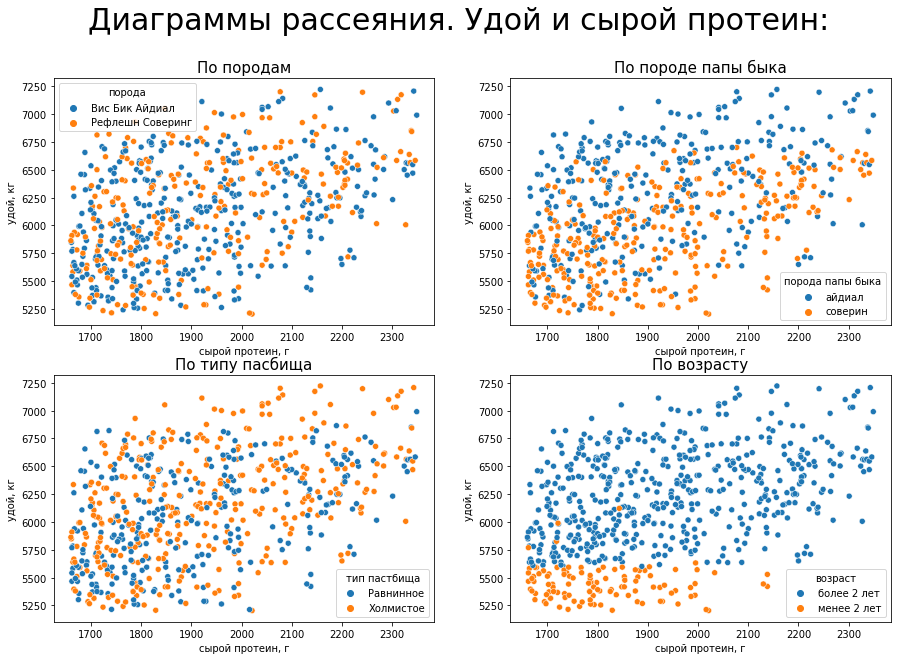

In [131]:
fig, axes = plt.subplots(2,2,figsize=(15,10))
plt.suptitle('Диаграммы рассеяния. Удой и сырой протеин:').set_size(30)
sns.scatterplot(data=main_data, y='удой, кг', x='сырой протеин, г',hue='порода',ax=axes[0,0])
axes[0,0].set_title('По породам').set_size(15)
sns.scatterplot(data=main_data, y='удой, кг', x='сырой протеин, г',hue='тип пастбища',ax=axes[1,0])
axes[1,0].set_title('По типу пасбища').set_size(15)
sns.scatterplot(data=main_data, y='удой, кг', x='сырой протеин, г',hue='порода папы быка',ax=axes[0,1])
axes[0,1].set_title('По породе папы быка').set_size(15)
sns.scatterplot(data=main_data, y='удой, кг', x='сырой протеин, г',hue='возраст',ax=axes[1,1])
axes[1,1].set_title('По возрасту').set_size(15)
plt.show()

Между удоем и сырым протеином не наблюдается зависимости. Так же по породе и типу пастбища расспределение выглядит равномерным. По возрасту и породе папы быка, так же как и в предыдущих случаях преимущество у коров старше 2 лет и породы "Айдиал".

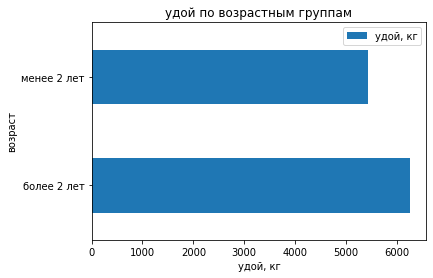

In [132]:
# столбчатая диаграмма удой по возрасту
main_data.pivot_table(index='возраст', values='удой, кг', aggfunc='median').plot.barh()
plt.xlabel('удой, кг')
plt.title('удой по возрастным группам')
plt.show()

Столбчатая диаграмма показывает разницу в кол-ве удоя для коров разных возрастных групп. Коровы старше 2 лет дают немнго больше молока.

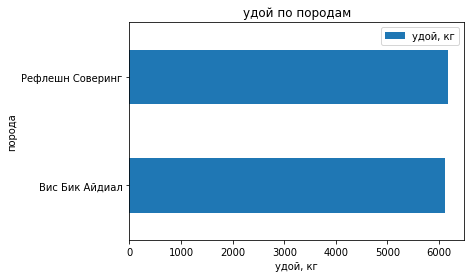

In [133]:
# столбчатая диаграмма удой по породам
main_data.pivot_table(index='порода', values='удой, кг', aggfunc='median').plot.barh()
plt.title('удой по породам')
plt.xlabel('удой, кг')
plt.show()

На столбчатой диаграмме видно, что удой практически не зависит от породы коровы.

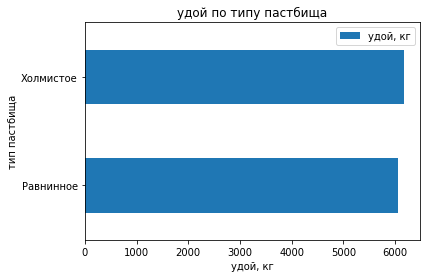

In [134]:
# столбчатая диаграмма удой по типу пастбища
main_data.pivot_table(index='тип пастбища', values='удой, кг', aggfunc='median').plot.barh()
plt.title('удой по типу пастбища')
plt.xlabel('удой, кг')
plt.show()

В данном случае, можно заметить, что разница в удое для разных пастбищ незначительна.

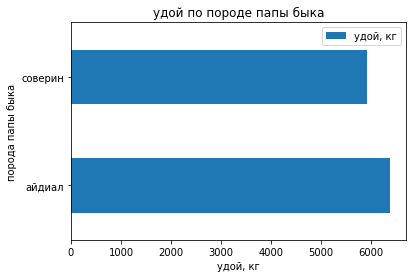

In [135]:
main_data.pivot_table(index='порода папы быка', values='удой, кг', aggfunc='median').plot.barh()
plt.title('удой по породе папы быка')
plt.xlabel('удой, кг')
plt.show()

Диаграмма показывает небольшое преимущество в удое для коров, у которых порода папы Айдиал.

## Вывод по корреляционному анализу:
1. Между "эке" и удоем есть нелинейная зависимость. Расспределение по типу пастбища и по породам выглядит равномерно. По возрасту заметны более высокие значения для коров старше 2 лет. По породе пары быка наблюдаем более высокие значения для породы "Айдиал".
2. Зависимость между удоем и "спо" так же нелинейная.  Расспределение по породам и типу пастбища выглидит однородно. По возрасту заметны более высокие значения для коров старше 2 лет. По породе пары быка наблюдаем более высокие значения для породы "Айдиал".
3. Между удоем и сырым протеином не наблюдается зависимости. Так же по породе и типу пастбища расспределение выглядит равномерным. По возрасту и породе папы быка, так же как и в предыдущих случаях преимущество у коров старше 2 лет и породы "Айдиал".
4. Коровы старше 2 лет дают немнго больше молока.
5. Удой практически не зависит от породы коровы.
6. Разница в удое для разных пастбищ незначительна.
7. Есть небольшое преимущество в удое для коров, у которых порода папы Айдиал.

## 5.Обучение модели линейной регрессии

In [136]:
# добавим в таблицу Экофермы недостающие столбцы и посотрим на результат
buy_data['эке'] = main_data['эке'].mean() * 1.05
buy_data['эке'] = buy_data['эке'].apply(lambda x: round(x,2))
buy_data['сырой протеин, г'] = main_data['сырой протеин, г'].mean() * 1.05
buy_data['сырой протеин, г'] = buy_data['сырой протеин, г'].astype(int)
buy_data['спо'] = main_data['спо'].mean() * 1.05
buy_data['спо'] = buy_data['спо'].apply(lambda x: 'высокий' if x > 0.92 else 'none') 
buy_data['эке2'] = buy_data['эке'] **2
buy_data['удой, кг'] = 0
buy_data['id'] = buy_data.index + 1
buy_data['вкус молока'] = 'NaN'
buy_data.head()

,порода,тип пастбища,порода папы быка,имя папы,"жирность,%","белок,%",возраст,эке,"сырой протеин, г",спо,эке2,"удой, кг",id,вкус молока
0,Вис Бик Айдиал,холмистое,Айдиал,Геркулес,3.58,3.076,более 2 лет,15.28,2019,высокий,233.4784,0,1,NaN
1,Вис Бик Айдиал,равнинное,Соверин,Буйный,3.54,3.081,менее 2 лет,15.28,2019,высокий,233.4784,0,2,NaN
2,Рефлешн Соверинг,равнинное,Соверин,Барин,3.59,3.074,более 2 лет,15.28,2019,высокий,233.4784,0,3,NaN
3,Рефлешн Соверинг,холмистое,Айдиал,Буйный,3.40,3.061,более 2 лет,15.28,2019,высокий,233.4784,0,4,NaN
4,Рефлешн Соверинг,равнинное,Айдиал,Буйный,3.64,3.074,более 2 лет,15.28,2019,высокий,233.4784,0,5,NaN


In [137]:
# создадим функцию с пайплайном для предварительной обработки, включающаю модель регрессии
def create_model_pipeline(numeric_features, categorical_features, model):
    # предварительная обработку данных
    numeric_transformer = Pipeline(steps=[
        ('scaler', StandardScaler())
    ])

    categorical_transformer = Pipeline(steps=[
        ('onehot', OneHotEncoder(drop='first',sparse_output=False, handle_unknown='ignore'))
    ])

    preprocessor = ColumnTransformer(
        transformers=[
            ('num', numeric_transformer, numeric_features),
            ('cat', categorical_transformer, categorical_features)
        ])

    # Создадим пайплайн, объединив предварительную обработку данных и модель регрессии
    model_pipeline = Pipeline([
        ('preprocessor', preprocessor),
        ('pipeline', model)
    ])

    return model_pipeline

In [138]:
# сохраним линейную регрессию в переменную
linear_regression_model = LinearRegression()

### 5.1 Создадим первую модель линейной регрессии.

In [139]:
# списки количественных и категориальных признаков
numeric_features_1 = ['эке', 'сырой протеин, г','спо']
categorical_features_1 = ['порода', 'возраст','порода папы быка']

# выделяем в отдельные переменные целевой признак и входные признаки
X_1 = main_data.drop('удой, кг', axis=1)
y_1 = main_data['удой, кг']

# Разделим датасет на тренировочную и тестовую выборки
X_train_1, X_test_1, y_train_1, y_test_1 = train_test_split(X_1, y_1, test_size=0.2, random_state=42)

# обучение модели и получение предсказаний на тестовых данных
model_1 = create_model_pipeline(numeric_features_1,categorical_features_1,linear_regression_model)
model_1.fit(X_train_1, y_train_1)
y_pred_1 = model_1.predict(X_test_1)

# получим метрику R²
r_squared_1 = r2_score(y_test_1, y_pred_1)
print("R² для первой модели:", r_squared_1)

R² для первой модели: 0.7965660541680695


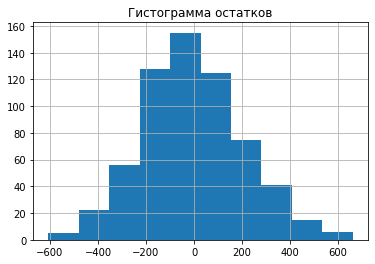

In [140]:
# Получим остатки и посторим гистограмму
residuals_1 = y_1 - model_1.predict(X_1)
residuals_1.hist()
plt.title('Гистограмма остатков')
plt.show()

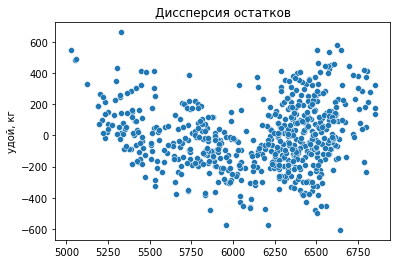

In [141]:
# график дисперсии остатокв 
sns.scatterplot(x=model_1.predict(X_1), y=residuals_1)
plt.title('Диссперсия остатков')
plt.show()

### Вывод по первой модели.
Первая модель показала себя не слишком хорошо, R² для первой модели: 0.7965660541680695. Гистограмма показывает, что остатки распределяются близко к нормальному. Дисперсия не имеет равномерного расспределения.

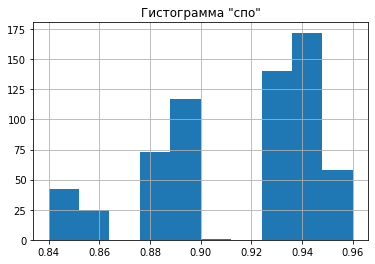

In [142]:
main_data['спо'].hist(bins=10)
plt.title('Гистограмма "спо"')
plt.show()

Гистограмма выявляет три категории спо : до 0.87, от 0.87 до 0.92 и от 0.92 и выше. По этим границам переведем спо в категориальный признак.

In [143]:
# переведем "спо" в кат. формат где значения от 0 до 0.87 - низкий, от 0.87 до 0.92 - средний, от 0.92 и выше - высокий 
main_data['спо'] = main_data['спо'].apply(lambda x: 'низкий' if x < 0.87  else ('средний' if 0.87 <x <0.92 else 'высокий') ) 
main_data.head()

,id,"удой, кг",эке,"сырой протеин, г",спо,порода,тип пастбища,порода папы быка,"жирность,%","белок,%",вкус молока,возраст
0,1,5863,14.2,1743,средний,Вис Бик Айдиал,Равнинное,айдиал,3.58,3.076,вкусно,более 2 лет
1,2,5529,12.8,2138,средний,Вис Бик Айдиал,Равнинное,соверин,3.54,3.079,вкусно,менее 2 лет
2,3,5810,14.0,1854,средний,Рефлешн Соверинг,Холмистое,соверин,3.59,3.074,не вкусно,более 2 лет
3,4,5895,12.4,2012,средний,Рефлешн Соверинг,Холмистое,айдиал,3.40,3.075,не вкусно,более 2 лет
4,5,5302,12.8,1675,средний,Вис Бик Айдиал,Равнинное,соверин,3.73,3.073,вкусно,менее 2 лет


In [144]:
# добавим новый столбец , с возведенным в квадрат показателем "эке" 
main_data['эке2'] = main_data['эке'] **2
main_data.head()

,id,"удой, кг",эке,"сырой протеин, г",спо,порода,тип пастбища,порода папы быка,"жирность,%","белок,%",вкус молока,возраст,эке2
0,1,5863,14.2,1743,средний,Вис Бик Айдиал,Равнинное,айдиал,3.58,3.076,вкусно,более 2 лет,201.64
1,2,5529,12.8,2138,средний,Вис Бик Айдиал,Равнинное,соверин,3.54,3.079,вкусно,менее 2 лет,163.84
2,3,5810,14.0,1854,средний,Рефлешн Соверинг,Холмистое,соверин,3.59,3.074,не вкусно,более 2 лет,196.00
3,4,5895,12.4,2012,средний,Рефлешн Соверинг,Холмистое,айдиал,3.40,3.075,не вкусно,более 2 лет,153.76
4,5,5302,12.8,1675,средний,Вис Бик Айдиал,Равнинное,соверин,3.73,3.073,вкусно,менее 2 лет,163.84


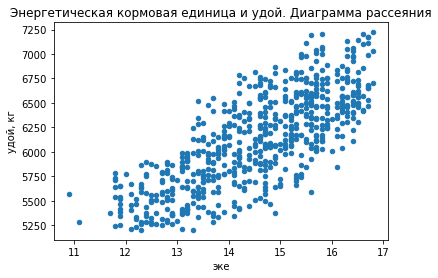

In [145]:
main_data.plot(kind='scatter', y='удой, кг', x='эке')
plt.title('Энергетическая кормовая единица и удой. Диаграмма рассеяния')
plt.show()

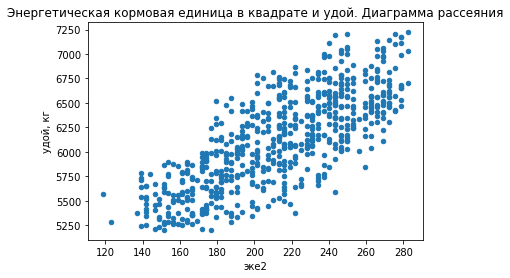

In [146]:
main_data.plot(kind='scatter', y='удой, кг', x='эке2')
plt.title('Энергетическая кормовая единица в квадрате и удой. Диаграмма рассеяния')
plt.show()

Возведение "эке" в квадрат позволило добиться линейной связи с удоем.

### 5.2 Вторая модель.
Создадим вторую модель. Для нее будем использовать "эке" в квадрате и "спо" как категориальный признак.

In [147]:
# списки количественных и категориальных признаков
numeric_features_2 = ['эке2', 'сырой протеин, г']
categorical_features_2 = ['порода', 'возраст','порода папы быка','спо']
X_2 = main_data.drop('удой, кг', axis=1)
y_2 = main_data['удой, кг']
# Разделим датасет на тренировочную и тестовую выборки
X_train_2, X_test_2, y_train_2, y_test_2 = train_test_split(X_2, y_2, test_size=0.2, random_state=42)

# обучение модели и получение предсказаний на тестовых данных
model_2 = create_model_pipeline(numeric_features_2,categorical_features_2,linear_regression_model)
model_2.fit(X_train_2, y_train_2)
y_pred_2 = model_2.predict(X_test_2)

# получим метрику R²
r_squared_2 = r2_score(y_test_2, y_pred_2)
print("R² второй модели:", r_squared_2)

R² второй модели: 0.8172502776770965


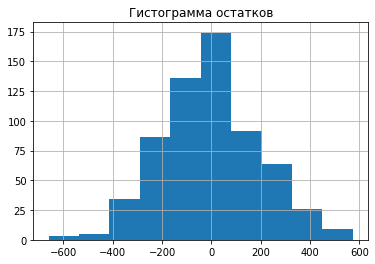

In [148]:
# Получим остатки и посторим гистограмму
residuals_2 = y_2 - model_2.predict(X_2)
residuals_2.hist()
plt.title('Гистограмма остатков')
plt.show()

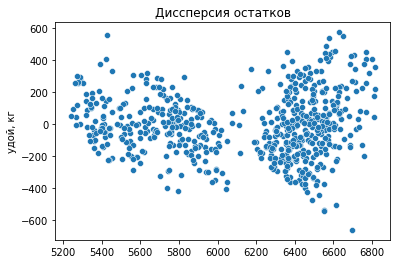

In [149]:
# график дисперсии остатокв 
sns.scatterplot(x=model_2.predict(X_2), y=residuals_2)
plt.title('Диссперсия остатков')
plt.show()

### Вывод по второй модели.
Вторая модель показала себя немного лучше первой, R² второй модели: 0.8172502776770965 против R² для первой модели: 0.7965660541680695. Значит возведение эке в квадрат и перевод спо в категориальный признак принесло свои плоды. При этом гистограмма остатков не улучшилась, так же как и дисперсия.

In [150]:
# добавим в таблицу имя папы быка
main_data =  main_data.merge(dad_data, on='id')
main_data.head()

,id,"удой, кг",эке,"сырой протеин, г",спо,порода,тип пастбища,порода папы быка,"жирность,%","белок,%",вкус молока,возраст,эке2,имя папы
0,1,5863,14.2,1743,средний,Вис Бик Айдиал,Равнинное,айдиал,3.58,3.076,вкусно,более 2 лет,201.64,Буйный
1,2,5529,12.8,2138,средний,Вис Бик Айдиал,Равнинное,соверин,3.54,3.079,вкусно,менее 2 лет,163.84,Соловчик
2,3,5810,14.0,1854,средний,Рефлешн Соверинг,Холмистое,соверин,3.59,3.074,не вкусно,более 2 лет,196.00,Барин
3,4,5895,12.4,2012,средний,Рефлешн Соверинг,Холмистое,айдиал,3.40,3.075,не вкусно,более 2 лет,153.76,Буйный
4,5,5302,12.8,1675,средний,Вис Бик Айдиал,Равнинное,соверин,3.73,3.073,вкусно,менее 2 лет,163.84,Барин


### 5.3 Третья модель.
Создадаим третью модель, в которую добавим имя папы.

In [151]:
# списки количественных и категориальных признаков
numeric_features_3 = ['эке2','сырой протеин, г']
categorical_features_3 = ['порода', 'возраст','спо','имя папы']
X_3 = main_data.drop(['удой, кг','эке','id','вкус молока'], axis=1)
y_3 = main_data['удой, кг']
# Разделим датасет на тренировочную и тестовую выборки
X_train_3, X_test_3, y_train_3, y_test_3 = train_test_split(X_3, y_3, test_size=0.2, random_state=42)

# обучение модели и получение предсказаний на тестовых данных
model_3 = create_model_pipeline(numeric_features_3,categorical_features_3,linear_regression_model)
model_3.fit(X_train_3, y_train_3)
y_pred_3 = model_3.predict(X_test_3)

# получим метрику R²
r_squared_3 = r2_score(y_test_3, y_pred_3)
print("R² третьей модели:", r_squared_3)

R² третьей модели: 0.8307702506114747


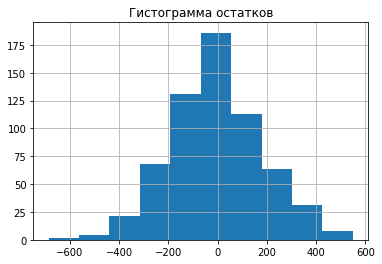

In [152]:
# Получим остатки и посторим гистограмму
residuals_3 = y_3 - model_3.predict(X_3)
residuals_3.hist()
plt.title('Гистограмма остатков')
plt.show()

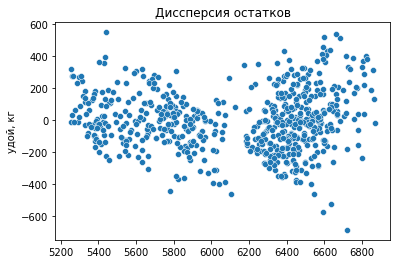

In [153]:
# график дисперсии остатокв 
sns.scatterplot(x=model_3.predict(X_3), y=residuals_3)
plt.title('Диссперсия остатков')
plt.show()

### Вывод по третьей модели.
Третья модель показала лучшие результаты, R² третьей модели: 0.8307702506114747. При этом гистограмма и дисперсия остатков так же не идеальны.

In [154]:
# функция для получения метрик и доверительного интервала моделей
def calculate_metrics(model, y_pred, y_test):
    mse = mean_squared_error(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    conf_interval = round(np.quantile(y_pred, 0.025)) , round(np.quantile(y_pred, 0.975))
    print(f"MSE: {mse}")
    print(f"MAE: {mae}")
    print(f"RMSE: {rmse}")
    print(f"Model: {model}")
    print(f"Conf_interval: {conf_interval}")
    return 

In [155]:
# получим метрики и остатки моделей
calculate_metrics('model_1', y_pred_1, y_test_1)
print()
calculate_metrics('model_2', y_pred_2, y_test_2)
print()
calculate_metrics('model_3', y_pred_3, y_test_3)

MSE: 42231.94944415689
MAE: 160.0682894824982
RMSE: 205.50413485902635
Model: model_1
Conf_interval: (5404, 6714)

MSE: 37937.999985758484
MAE: 149.6870113163475
RMSE: 194.77679529594505
Model: model_2
Conf_interval: (5394, 6727)

MSE: 35131.31592368582
MAE: 142.89319251642937
RMSE: 187.4334973362174
Model: model_3
Conf_interval: (5394, 6767)


### 5.4 Вывод по моделям линейной регрессии.
Лучшие метрики у третьей модели, именно ее и будем использовать для прогноза удоя.

In [156]:
# приведем столбцы таблице Экофермы к формату основной
buy_data = buy_data[main_data.columns]

Получим предсказание по удою для коров Экофермы и добавим их в таблицу.

In [157]:
# списки количественных и категориальных признаков
#numeric_features_buy = ['эке2','сырой протеин, г']
#categorical_features_buy = ['порода', 'возраст','спо','имя папы']
X_buy = buy_data.drop(['удой, кг','эке','id','вкус молока'], axis=1)



# предсказания для коров Экофермы
preds = model_3.predict(X_buy)

In [158]:
# добавим значения в таблицу
buy_data['удой, кг'] = preds
buy_data['удой, кг'] = buy_data['удой, кг'].apply(lambda x: round(x))
buy_data.head()

,id,"удой, кг",эке,"сырой протеин, г",спо,порода,тип пастбища,порода папы быка,"жирность,%","белок,%",вкус молока,возраст,эке2,имя папы
0,1,6570,15.28,2019,высокий,Вис Бик Айдиал,холмистое,Айдиал,3.58,3.076,NaN,более 2 лет,233.4784,Геркулес
1,2,6345,15.28,2019,высокий,Вис Бик Айдиал,равнинное,Соверин,3.54,3.081,NaN,менее 2 лет,233.4784,Буйный
2,3,6327,15.28,2019,высокий,Рефлешн Соверинг,равнинное,Соверин,3.59,3.074,NaN,более 2 лет,233.4784,Барин
3,4,6575,15.28,2019,высокий,Рефлешн Соверинг,холмистое,Айдиал,3.40,3.061,NaN,более 2 лет,233.4784,Буйный
4,5,6575,15.28,2019,высокий,Рефлешн Соверинг,равнинное,Айдиал,3.64,3.074,NaN,более 2 лет,233.4784,Буйный


### Вывод. 
Для дальнейшего использования была выбрана третья модель линейной регрессии. С ее помощью добавили прогнозируемые значения удоя в таблицу Экофермы.

## 6.Обучение модели логистической регрессии

In [159]:
# переведем "вкус молока" в числовой формат : 1 - вкусно , 2 - не вкусно
main_data['вкус молока'] = main_data['вкус молока'].apply(lambda x: 1 if x == 'вкусно' else 0)

Создадим модель логистической регрессии.

In [160]:
# списки количественных и категориальных признаков
numeric_features = ['эке2','жирность,%','белок,%','сырой протеин, г']
categorical_features = ['возраст','спо','тип пастбища','порода',"порода папы быка"]
X = main_data.drop('вкус молока', axis=1)
y = main_data['вкус молока']

# Разделим датасет на тренировочную и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=38)

# сохраним логистическую регрессию в переменную
logistic_regression_model = LogisticRegression()

# обучение модели и получение предсказаний на тестовых данных
model = create_model_pipeline(numeric_features,categorical_features,logistic_regression_model)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

# получим и выведем на экран значения recall, precision и accuracy
recall = recall_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)
print('recall: ',round(recall ,3))
print('precision: ',round(precision,3))
print("Accuracy:", round(accuracy,3))

recall:  0.893
precision:  0.72
Accuracy: 0.73


В нашей задаче необходимо найти коров с вусным молоком и нам нужно быть действительно увереными в этом. Так же необходимо исключить ошибоччно предсказаных коров с вкусным молоком. Поэтому необходимо за счет изменения порога повысить precision до 1.

In [161]:
# таблица с вероятностями для предсказаний
y_proba = model.predict_proba(X_test)[:,1]

data = pd.DataFrame(zip(y_test, y_proba),
             columns = ['y_valid', 'y_proba'])

data.head()

,y_valid,y_proba
0,0,0.624637
1,1,0.840660
2,1,0.720061
3,1,0.514491
4,1,0.585532


In [162]:
# список порогов
thresholds = [round(i,2) for i in np.linspace(0.1,1,num = 5,endpoint=False)]
print(thresholds)

[0.1, 0.28, 0.46, 0.64, 0.82]


In [163]:
# создаём переменную, которая будет хранить список новых колонок
columns = []

# добавим столбцы с новыми предсказаниями в таблицу
for i in thresholds:
	columns.append('y_pred_'+str(i))
	data['y_pred_'+str(i)] = data['y_proba'].apply(lambda x: 1 if x>=i else 0)

# выведем 5 случайных строк
print(data.sample(5))

     y_valid   y_proba  y_pred_0.1  y_pred_0.28  y_pred_0.46  y_pred_0.64  \
3          1  0.514491           1            1            1            0   
105        1  0.550362           1            1            1            0   
103        1  0.695890           1            1            1            1   
24         0  0.543124           1            1            1            0   
125        1  0.655608           1            1            1            1   

     y_pred_0.82  
3              0  
105            0  
103            0  
24             0  
125            0  


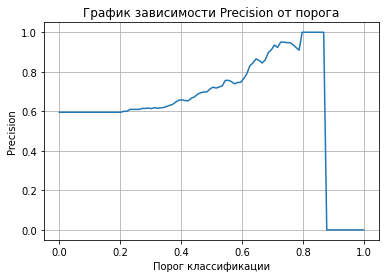

In [164]:
# посторим график зависимости Precision от порога

# список порогов для  Precision
thresholds = np.linspace(0, 1, 100)  

# пустой список для хранения значений Precision
precisions = []

# Precision для каждого порога
for threshold in thresholds:
    y_pred = (y_proba > threshold).astype(int)  # Здесь y_pred_prob - вероятности
    precision = precision_score(y_test, y_pred,zero_division=0)
    precisions.append(precision)

# график зависимости Precision от порога
plt.plot(thresholds, precisions)
plt.xlabel('Порог классификации')
plt.ylabel('Precision')
plt.title('График зависимости Precision от порога')
plt.grid()
plt.show()


На графике видим, что precision достигает значения 1 при пороге 8.2. Такой порог будем использовать для модели.

Метрики модели:
recall:  0.093
precision:  1.0
Accuracy: 0.46


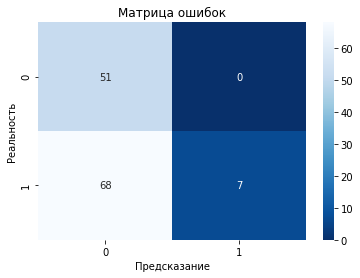

In [165]:
# построим матрицу ошибок
rec = recall_score(y_test, data['y_pred_0.82'])
prec = precision_score(y_test, data['y_pred_0.82'])
acc = accuracy_score(y_test, data['y_pred_0.82'])

print('Метрики модели:')
print('recall: ',round(rec ,3))
print('precision: ',round(prec,3))
print("Accuracy:", round(acc,3))

cm = confusion_matrix(y_test,data['y_pred_0.82'])
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues_r')
plt.title('Матрица ошибок')
plt.ylabel('Реальность')
plt.xlabel('Предсказание')
plt.show()

Матрица ошибок показывает, что при пороге 8.2 удается свести к нулю кол-во неправильно предсказаного вкусного молока.

Сделаем прогноз по вкусу молока для таблицы Экофермы.

In [166]:
# списки колличественных и категориальных столбцов

X_b = buy_data.drop('вкус молока', axis=1)


# порог 0.82
pred = model.predict_proba(X_b)[:,1] > 0.82

/opt/conda/lib/python3.9/site-packages/sklearn/preprocessing/_encoders.py:228: UserWarning: Found unknown categories in columns [2, 4] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


In [167]:
# добавим в таблицу Экофермы предсказание вкуса молока
buy_data['вкус молока'] = pred
buy_data['вкус молока'] = buy_data['вкус молока'].apply(lambda x: 'вкусное' if x == True else 'не вкусное') 
buy_data

,id,"удой, кг",эке,"сырой протеин, г",спо,порода,тип пастбища,порода папы быка,"жирность,%","белок,%",вкус молока,возраст,эке2,имя папы
0,1,6570,15.28,2019,высокий,Вис Бик Айдиал,холмистое,Айдиал,3.58,3.076,не вкусное,более 2 лет,233.4784,Геркулес
1,2,6345,15.28,2019,высокий,Вис Бик Айдиал,равнинное,Соверин,3.54,3.081,не вкусное,менее 2 лет,233.4784,Буйный
2,3,6327,15.28,2019,высокий,Рефлешн Соверинг,равнинное,Соверин,3.59,3.074,не вкусное,более 2 лет,233.4784,Барин
3,4,6575,15.28,2019,высокий,Рефлешн Соверинг,холмистое,Айдиал,3.40,3.061,не вкусное,более 2 лет,233.4784,Буйный
4,5,6575,15.28,2019,высокий,Рефлешн Соверинг,равнинное,Айдиал,3.64,3.074,не вкусное,более 2 лет,233.4784,Буйный
5,6,6388,15.28,2019,высокий,Рефлешн Соверинг,равнинное,Соверин,3.63,3.053,не вкусное,менее 2 лет,233.4784,Геркулес
7,8,6551,15.28,2019,высокий,Вис Бик Айдиал,равнинное,Соверин,3.57,3.079,не вкусное,более 2 лет,233.4784,Буйный
9,10,6369,15.28,2019,высокий,Рефлешн Соверинг,холмистое,Айдиал,3.40,3.079,не вкусное,менее 2 лет,233.4784,Буйный
10,11,6322,15.28,2019,высокий,Вис Бик Айдиал,холмистое,Соверин,3.73,3.055,не вкусное,более 2 лет,233.4784,Соловчик
11,12,6594,15.28,2019,высокий,Рефлешн Соверинг,равнинное,Соверин,3.73,3.073,не вкусное,более 2 лет,233.4784,Геркулес


Как мы видим, модель спрогнозировала невкусное молоко для всех коров Экофермы.

##  7.Итоговые выводы:
1. Модель логистической регрессии предсказала не вкусное молоко для всех коров Экофермы. Поэтому фермер не сможет купить ни одной коровы без риска.
2. Для улучшения работы моделей мы перевели "спо" в категориальный признак, а "эке" возвели в квадрат - это позволило избавиться от нелинейной зависимости.
3. При анализе рисков или экономических расчетов, метрики моделей классификации, включая логистическую регрессию, могут быть критически важными для оценки и принятия решений. Ниже перечислены некоторые ключевые метрики, которые могут быть полезными в таких сценариях:<br>
1) **Accuracy (Точность):** Эта метрика показывает, как часто модель правильно классифицирует наблюдения. Важно иметь хорошую точность, чтобы избегать ошибок при прогнозировании.<br>
2) **Precision (Точность):** Эта метрика показывает долю истинно положительных прогнозов относительно общего числа положительных прогнозов. Она важна, когда ошибки положительного класса могут быть дорогостоящими или рискованными.<br>
3) **Recall (Полнота):** Эта метрика показывает долю истинно положительных прогнозов относительно общего числа истинно положительных случаев. Полнота важна, когда важно не упустить положительные случаи (например, при выявлении рисков).<br>
4) **Конфузионная матрица (Confusion Matrix):** Подробное изучение конфузионной матрицы может помочь понять, как модель классифицирует разные случаи и выявляет риски и ошибки.<br>

Выбор конкретных метрик будет зависеть от конкретных целей и особенностей задачи анализа рисков или экономических расчетов. Важно выбирать метрики, которые наилучшим образом соответствуют конкретным требованиям и позволяют принимать информированные решения.<br>
Рекомендации для фермера:
1. Можно было бы добавить больше возрастных категорий для коров, это позволило бы точнее настраивать модель.
2. Так же стоит ввести единый вариант оформления данных.